<a href="https://colab.research.google.com/github/newguy7/DataScienceBootCamp/blob/main/ClassNotes/KnnClassifierModelEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
X=data['data']
Y=data['target']

In [ ]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
pred_labels=knn.predict(X_test)

In [ ]:
# accuracy
# f1 score
# precision
# recall
# roc_auc
# confusion matrix

94.73684210526315


In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred_labels)
print(acc)

0.9385964912280702


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,pred_labels))

[[31  5]
 [ 2 76]]


In [ ]:
from sklearn.metrics import precision_score

print(precision_score(y_test,pred_labels))

0.9382716049382716


In [ ]:
from sklearn.metrics import recall_score

print(recall_score(y_test,pred_labels))

0.9743589743589743


In [ ]:
from sklearn.metrics import f1_score

print(f1_score(y_test,pred_labels))

0.9559748427672956


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,knn.predict_proba(X_test)[:, 1])

0.9757834757834759

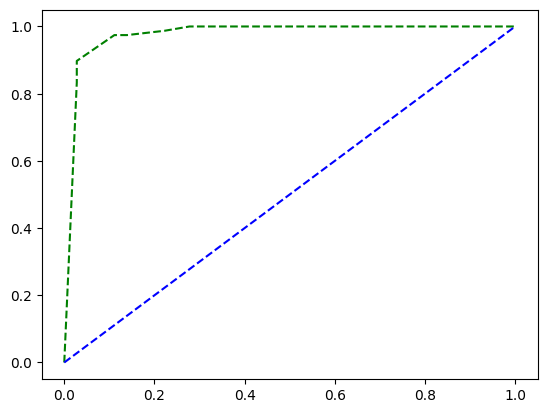

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.plot(fpr, tpr, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.show()